### Full Name : Zahra Maleki
### Student Number : 400110009 


# CART Algorithm Implementation with MNIST Dataset

## Goal
The objective is to implement the Classification and Regression Trees (CART) algorithm from scratch and apply it to the MNIST dataset. After completing the implementation, you will compare its performance with scikit-learn's `DecisionTreeClassifier` and analyze the results through visualizations.

## Part 1: Data Preparation and Exploration

1. **Data Normalization**  
   - Normalize the data using **z-score normalization** to ensure that each feature has a mean of 0 and a standard deviation of 1.

2. **Data Visualization**
   a. Display 10 sample images from the **training set**, **validation set**, and **test set**.  
   b. Create a **histogram** showing the distribution of labels across the **training set**, **validation set**, and **test set**.

In [12]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

def prepare_data(batch_size=64, train_ratio=0.8):
    transform = transforms.Compose([
        # To DO
        transforms.ToTensor(),
    ])

    full_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    train_size = int(len(full_dataset) * train_ratio)
    val_size = len(full_dataset) - train_size
    train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader

In [15]:
def explore_data(data_loader,dataset_name="Training"):
    # Get a batch of data
    # TO DO
    # Plot sample images
    # TO DO
    # Plot label distribution
    # TO DO
    images, labels = next(iter(data_loader))
    if isinstance(images[0], torch.Tensor):
        images = images.numpy()
    else:
        images = np.array([np.array(img) for img in images])  # Convert PIL images to NumPy

    plt.figure(figsize=(10, 2))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"{labels[i].item()}")
        plt.axis('off')
    plt.suptitle(f"Sample Images from {dataset_name} Set")
    plt.show()

    label_counts = np.bincount(labels.numpy())
    plt.figure(figsize=(6, 4))
    plt.bar(range(10), label_counts, tick_label=range(10))
    plt.title(f"Label Distribution in {dataset_name} Set")
    plt.xlabel("Digits")
    plt.ylabel("Frequency")
    plt.show()


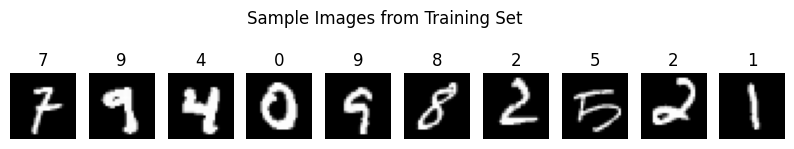

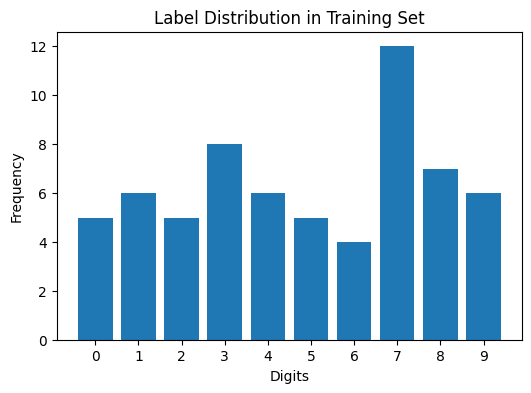

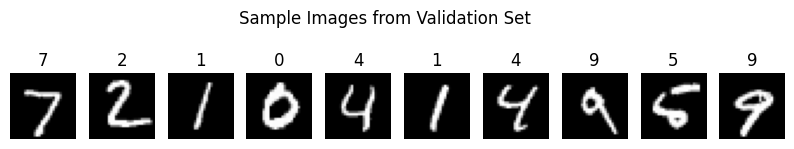

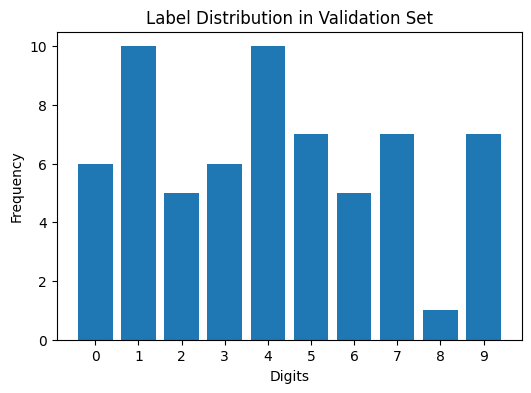

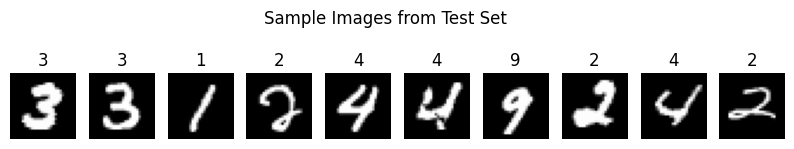

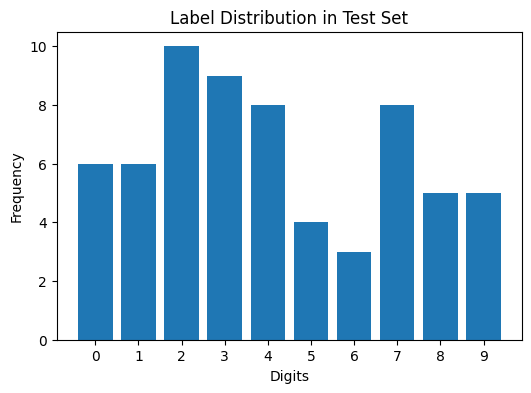

In [16]:
train_loader, val_loader, test_loader = prepare_data()
explore_data(train_loader, dataset_name="Training")
explore_data(test_loader, dataset_name="Validation")
explore_data(val_loader, dataset_name="Test")


Prepare the data for use with the CART algorithm by flattening the images.

In [17]:
def prepare_data_for_cart(data_loader):
    # TO DO
    X, y = [], []
    
    for images, labels in data_loader:
   
        flattened_images = images.view(images.size(0), -1).numpy()
        X.append(flattened_images)
        y.append(labels.numpy())
    
    X = np.vstack(X)
    y = np.hstack(y)
    
    return X, y

In [18]:
X_train, y_train = prepare_data_for_cart(train_loader)
X_val, y_val = prepare_data_for_cart(val_loader)
X_test, y_test = prepare_data_for_cart(test_loader)

## Part 2: CART Algorithm Implementation

1. Implement the CART algorithm from scratch, including:
   a. Node class to represent tree nodes
   b. DecisionTree class with the following methods:
      - `fit(X, y)`: Train the decision tree
      - `predict(X)`: Make predictions on new data
      - `_build_tree(X, y, depth)`: Recursively build the tree
      - `_find_best_split(X, y)`: Find the best feature and threshold for splitting
      - `_calculate_gini_impurity(y)`: Calculate Gini impurity for a set of labels
2. Your implementation should support the following hyperparameters:
   - `max_depth`: Maximum depth of the tree
   - `min_samples_split`: Minimum number of samples required to split an internal node

Note: Feel free to change, add, and remove functions.

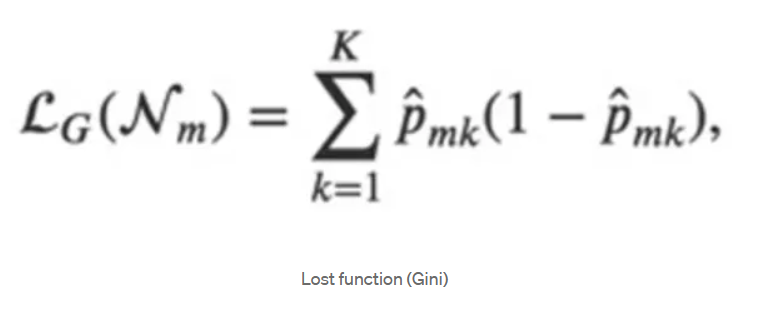

In [19]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree_CART:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        # Implement recursive tree building here
        # TO DO
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        best_feature, best_threshold = self._find_best_split(X, y)

        left_idx, right_idx = self._split(X[:, best_feature], best_threshold)
        left = self._build_tree(X[left_idx, :], y[left_idx], depth + 1)
        right = self._build_tree(X[right_idx, :], y[right_idx], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold, left=left, right=right)


    def _find_best_split(self, X, y):
        # Implement best split finding here
        # TO DO
        n_samples, n_features = X.shape
        best_gini = float('inf')  
        split_idx, split_threshold = None, None

        for feature_idx in range(n_features):
            X_column = X[:, feature_idx]
            thresholds = np.unique(X_column)

            for threshold in thresholds:
               
                left_idx, right_idx = self._split(X_column, threshold)

                if len(left_idx) == 0 or len(right_idx) == 0:
                    continue

                gini = self._calculate_gini_impurity(y[left_idx], y[right_idx])

                if gini < best_gini:

                    best_gini = gini
                    split_idx = feature_idx
                    split_threshold = threshold

        return split_idx, split_threshold
    
    def _split(self, X_column, split_threshold):
        left_idx = np.argwhere(X_column <= split_threshold).flatten()
        right_idx = np.argwhere(X_column > split_threshold).flatten()
        return left_idx, right_idx

    def _gini_impurity(self, y):
        # Implement Gini impurity calculation here
        # TO DO
        m = len(y)
        if m == 0:
            return 0

        class_counts = np.bincount(y)
        probabilities = class_counts / m
        gini = 1 - np.sum(probabilities ** 2)
        return gini
    
    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def predict(self, X):
        # Implement prediction here
        # TO DO
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _calculate_gini_impurity(self, left_y, right_y):
    
        n_left = len(left_y)
        n_right = len(right_y)
        n_total = n_left + n_right

        def gini(y):
            class_counts = np.bincount(y)
            probs = class_counts / len(y)
            return 1 - sum(probs**2)

        left_gini = gini(left_y)
        right_gini = gini(right_y)
        weighted_gini = (n_left / n_total) * left_gini + (n_right / n_total) * right_gini
        return weighted_gini

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)


## Part 3: Model Evaluation and Comparison

1. Train your CART implementation on the MNIST training data.
2. Evaluate your model's performance on the test set and report the accuracy.
3. Train scikit-learn's DecisionTreeClassifier on the same data.
4. Compare the performance of your implementation with scikit-learn's version.
5. Create a plot showing how accuracy changes with tree depth for both implementations.

In [20]:
X_train, y_train = prepare_data_for_cart(train_loader)
X_test, y_test = prepare_data_for_cart(test_loader)

tree = DecisionTree_CART(max_depth=5)
tree.fit(X_train, y_train)

predictions = tree.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 67.74%


## Question
What is the difference between ID3 and CART algorithm

## Answer:

##### Type of Trees:

ID3: Used for classification only.

CART: Handles both classification and regression.

##### Splitting Criterion:

ID3: Uses Information Gain (based on entropy).

CART: Uses Gini Impurity (classification) or MSE (regression).

##### Numerical Features:

ID3: Requires discretization for continuous features.

CART: Handles continuous and categorical features directly.

##### Tree Structure:

ID3: Produces multivariate (non-binary) trees.

CART: Produces binary trees.

##### Pruning:

ID3: No built-in pruning.

CART: Has built-in pruning mechanisms.

##### Output:

ID3: Outputs discrete classes.

CART: Outputs discrete classes or continuous values.

ID3 is focused on classification and uses Information Gain to build the tree, mainly working with categorical data.

CART can handle both classification and regression, using Gini Impurity for classification and MSE for regression, and works efficiently with both continuous and categorical data.